# Method-1 of Preprocessing

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

preprocessed = pd.read_csv(r"F:\Subject Assignment\Keerthan\Code\Stress-Predict-Dataset-main\Processed_data\Improved_All_Combined_hr_rsp_binary.csv")

In [2]:
def Data_Reader(x):
    
    #DATA READING IN LOOP
    """ Reading data folder by folder in for loop by manual string intervention and if loop for x<10 because it shoudl
    generate values like 01,02,03... and after 9 it will generate 10,11,12..."""
    
    if x<10:
        ACC = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/ACC.csv')
        BVP = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/BVP.csv')
        EDA = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/EDA.csv')
        HR = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/HR.csv')
        IBI = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/IBI.csv')
        tags = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/tags_S0'+str(x)+'.csv')
        TEMP = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/TEMP.csv')
    else:
        ACC = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/ACC.csv')
        BVP = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/BVP.csv')
        EDA = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/EDA.csv')
        HR = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/HR.csv')
        IBI = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/IBI.csv')
        tags = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/tags_S'+str(x)+'.csv')
        TEMP = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/TEMP.csv')
    
    
    """We need to create a time attribute where each of the data is recorded, the column name of each dataframe attribute
    is the start time + 1 of the attribute"""
    ACC_time = int(float(ACC.columns[0])) - 1
    BVP_time = int(float(BVP.columns[0])) - 1
    EDA_time = int(float(EDA.columns[0])) - 1
    HR_time = int(float(HR.columns[0])) - 1
    IBI_time = int(float(IBI.columns[0])) - 1
    TEMP_time = int(float(TEMP.columns[0])) - 1
    
    """Dropping the first row value of all the dataframe attribute because the value is all same """
    
    ACC = ACC.drop(ACC.index[0:1]).reset_index(drop = True)
    BVP = BVP.drop(BVP.index[0:1]).reset_index(drop = True)
    EDA = EDA.drop(EDA.index[0:1]).reset_index(drop = True)
    HR = HR.drop(HR.index[0:1]).reset_index(drop = True)
    IBI = IBI.drop(IBI.index[0:1]).reset_index(drop = True)
    TEMP = TEMP.drop(TEMP.index[0:1]).reset_index(drop = True)
    
    """Creating new variable called loop which is generates the value if the lenght of the attribute"""
    
    ACC['loop'] = np.arange(ACC.shape[0])
    BVP['loop'] = np.arange(BVP.shape[0])
    EDA['loop'] = np.arange(EDA.shape[0])
    HR['loop'] = np.arange(HR.shape[0])
    IBI['loop'] = np.arange(IBI.shape[0])
    TEMP['loop'] = np.arange(TEMP.shape[0])
    
    """Fucntion to add the arange length attribute with the time for each row in seconds incremental"""
    def time(x,y):
        return x + y
    
    """applying the function"""
    ACC['Time(sec)'] = np.vectorize(time)(ACC['loop'], ACC_time)
    BVP['Time(sec)'] = np.vectorize(time)(BVP['loop'], BVP_time)
    EDA['Time(sec)'] = np.vectorize(time)(EDA['loop'], EDA_time)
    HR['Time(sec)'] = np.vectorize(time)(HR['loop'], HR_time)
    IBI['Time(sec)'] = np.vectorize(time)(IBI['loop'], IBI_time)
    TEMP['Time(sec)'] = np.vectorize(time)(TEMP['loop'], TEMP_time)
    
    """dropping loop attribute as it is not longer necessary"""
    ACC.drop('loop',axis = 1,inplace = True)
    BVP.drop('loop',axis = 1,inplace = True)
    EDA.drop('loop',axis = 1,inplace = True)
    HR.drop('loop',axis = 1,inplace = True)
    IBI.drop('loop',axis = 1,inplace = True)
    TEMP.drop('loop',axis = 1,inplace = True)
    
    #Renaming each dataframe 
    """Renaming the columns to our fitting so we can merge all the files under one name"""
    ACC.rename({ACC.columns[0]:'accelerometer_X',ACC.columns[1]:'accelerometer_Y',ACC.columns[2]:'accelerometer_Z'},axis = 1,inplace = True)
    BVP.rename({BVP.columns[0]:'BVP'},axis = 1,inplace = True)
    EDA.rename({EDA.columns[0]:'EDA'},axis = 1,inplace = True)
    HR.rename({HR.columns[0]:'heart_rate'},axis = 1,inplace=True)
    IBI.rename({IBI.columns[0]:'IBI_0',IBI.columns[1]:'IBI_1'},axis = 1,inplace = True)
    TEMP.rename({TEMP.columns[0]:'temp'},axis = 1,inplace = True)
    
    """setting time as index so i can merge all of the tiogether on index by pd.concat"""
    ACC.set_index('Time(sec)',inplace = True)
    BVP.set_index('Time(sec)',inplace = True)
    EDA.set_index('Time(sec)',inplace = True)
    HR.set_index('Time(sec)',inplace = True)
    IBI.set_index('Time(sec)',inplace = True)
    TEMP.set_index('Time(sec)',inplace = True)
    
    global final_1,final_2
    
    """merging all the csv on index aka time(sec) but here IBI is not used because we will lose 50% of the data if we use IBI"""
    final_1 = pd.concat([ACC,BVP,EDA,HR,TEMP],axis=1,sort=False).reset_index().dropna()
    final_1.reset_index(drop = True,inplace = True)
    
    """Here IBI is used"""
    final_2 = pd.concat([ACC,BVP,EDA,HR,IBI,TEMP],axis=1,sort=False).reset_index().dropna()
    final_2.reset_index(drop = True,inplace = True)
    
    pre = preprocessed[preprocessed['Participant'] == x]
    
    final_1['Participant'] = x
    final_2['Participant'] = x
    
    """Finally merging with preprocessed data on time(sec) to get the label attribute"""
    final_1 = final_1.merge(pre[['Label','Time(sec)']],on = 'Time(sec)',how = 'inner')
    final_2 = final_2.merge(pre[['Label','Time(sec)']],on = 'Time(sec)',how = 'inner')
    

"""There are 35 subjects data which means i have to loop through 35 folders to read the data and concat each of it after processing"""
final_df1 = pd.DataFrame()
final_df2 = pd.DataFrame()
for i in range(2,36):
    Data_Reader(i)
    final_df1 = pd.concat([final_df1,final_1],ignore_index = True)
    final_df2 = pd.concat([final_df2,final_2],ignore_index = True)
    if i<10:
        print('Folder S0'+str(i),' is extracted/Preprocessed and merged to single csv')
    else:
        print('Folder S'+str(i),' is extracted/Preprocessed and merged to single csv')

Folder S02  is extracted/Preprocessed and merged to single csv
Folder S03  is extracted/Preprocessed and merged to single csv
Folder S04  is extracted/Preprocessed and merged to single csv
Folder S05  is extracted/Preprocessed and merged to single csv
Folder S06  is extracted/Preprocessed and merged to single csv
Folder S07  is extracted/Preprocessed and merged to single csv
Folder S08  is extracted/Preprocessed and merged to single csv
Folder S09  is extracted/Preprocessed and merged to single csv
Folder S10  is extracted/Preprocessed and merged to single csv
Folder S11  is extracted/Preprocessed and merged to single csv
Folder S12  is extracted/Preprocessed and merged to single csv
Folder S13  is extracted/Preprocessed and merged to single csv
Folder S14  is extracted/Preprocessed and merged to single csv
Folder S15  is extracted/Preprocessed and merged to single csv
Folder S16  is extracted/Preprocessed and merged to single csv
Folder S17  is extracted/Preprocessed and merged to sin

In [18]:
final_df1.shape

(112470, 10)

In [17]:
final_df1.head()

Time(sec)  accelerometer_X  accelerometer_Y  accelerometer_Z   BVP  \
0  1644227583             -8.0             10.0             70.0  0.00   
1  1644227584             -7.0              9.0             63.0  0.01   
2  1644227585             -6.0              9.0             60.0  0.01   
3  1644227586             -5.0              3.0             56.0 -0.00   
4  1644227587             -5.0              0.0             54.0 -0.03   

        EDA  heart_rate   temp  Participant  Label  
0  0.664036      118.00  34.79            2      0  
1  0.666599      113.50  34.79            2      0  
2  0.669162       93.00  34.68            2      0  
3  0.678132       93.25  34.68            2      0  
4  0.683258       86.40  34.68            2      0

# Basic EDA

In [19]:
"""Checking null value of each individual columns"""
final_df1.isnull().sum()

Time(sec)          0
accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
BVP                0
EDA                0
heart_rate         0
temp               0
Participant        0
Label              0
dtype: int64

In [20]:
"""Checking Duplicated value of entire dataframe"""
final_df1.duplicated().sum()

0

In [27]:
"""Checking value count of 0's and 1's """

"""From this description we get to know that the data is imbalanced with more number of 0's and less number of 1's
But this can be solved by downsampling and upsampling"""
final_df1['Label'].value_counts()

0    75655
1    36815
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

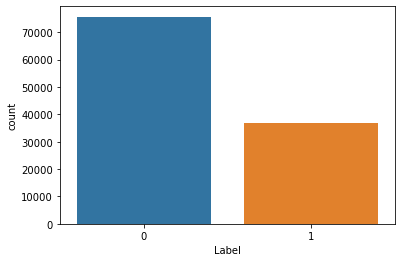

In [30]:
sns.countplot(final_df1['Label'])

# Downsampling

In [31]:
"""Separate Zeros and Ones then downsampling the 0's and concat them together to balance the data"""
zero_final_df1 = final_df1[final_df1['Label'] == 0]
one_final_df1 = final_df1[final_df1['Label'] == 1]

"""Randomly selecting 37000 0's data"""
zero_final_df1 = zero_final_df1.sample(37000)

In [33]:
zero_final_df1.shape,one_final_df1.shape

((37000, 10), (36815, 10))

In [34]:
"""Concat zeros and ones after downsampling"""
down_final_df1 = pd.concat([zero_final_df1,one_final_df1],ignore_index = True)

In [35]:
down_final_df1.shape

(73815, 10)

In [36]:
down_final_df1.head()

Time(sec)  accelerometer_X  accelerometer_Y  accelerometer_Z     BVP  \
0  1645444663             -9.0              0.0             63.0   18.76   
1  1645447631            -33.0             24.0             50.0  -25.19   
2  1646050998             -9.0             -2.0             62.0  -22.39   
3  1646063326            -32.0              8.0             55.0 -158.24   
4  1644837457            -64.0              1.0              9.0  -40.65   

        EDA  heart_rate   temp  Participant  Label  
0  0.255000       85.28  30.87           14      0  
1  0.380532       71.93  30.85           15      0  
2  0.246001       89.03  30.05           22      0  
3  0.313926       74.90  32.39           26      0  
4  1.531733       68.75  31.01            7      0

In [37]:
down_final_df1['Label'].value_counts()

0    37000
1    36815
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

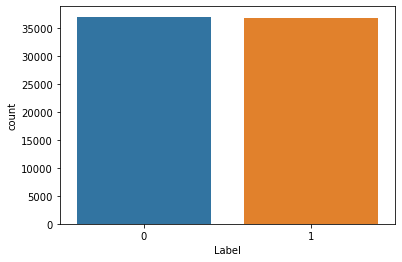

In [38]:
sns.countplot(down_final_df1['Label'])

In [ ]:
sns.pairplot(down_final_df1)
plt.show()

# Skewed Data

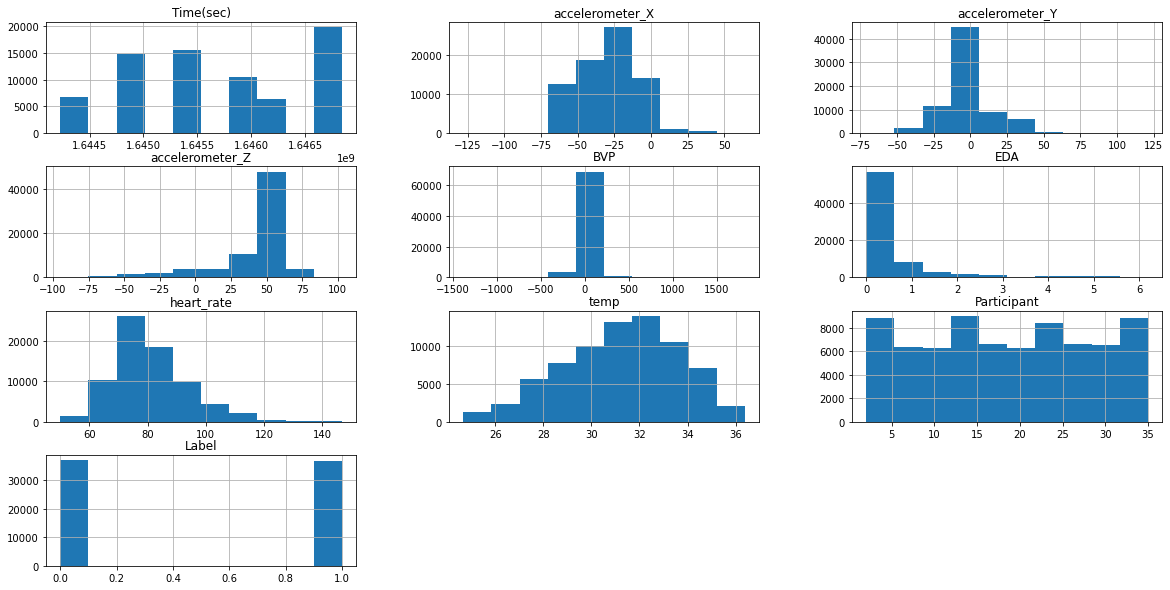

In [41]:
"""Histogram plot helps us figure out which data attribute is skewed left or right.
Here for ex EDA is right skewed data and temp is left skewed data"""
down_final_df1.hist(figsize = (20,10))
plt.show()

# Outlier

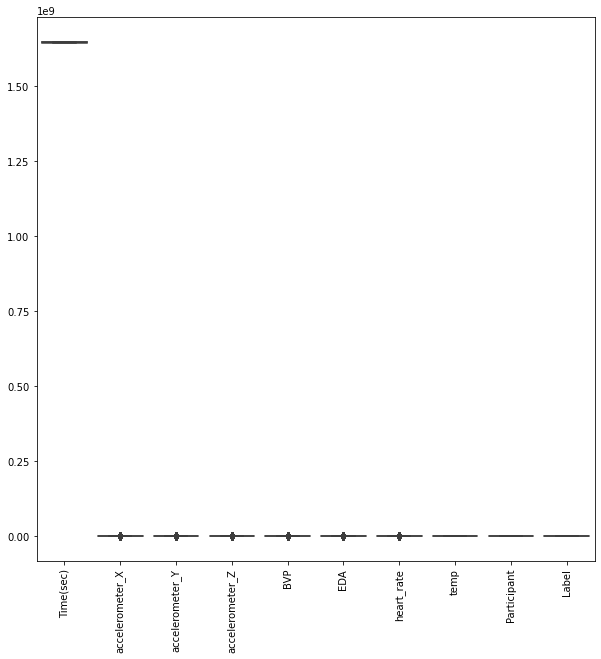

In [43]:
"""Box plot helps us find the outlier which will be handled while modeling by z-score"""
plt.figure(figsize=(10,10))
sns.boxplot(data=down_final_df1)
plt.xticks(rotation=90)
plt.show()

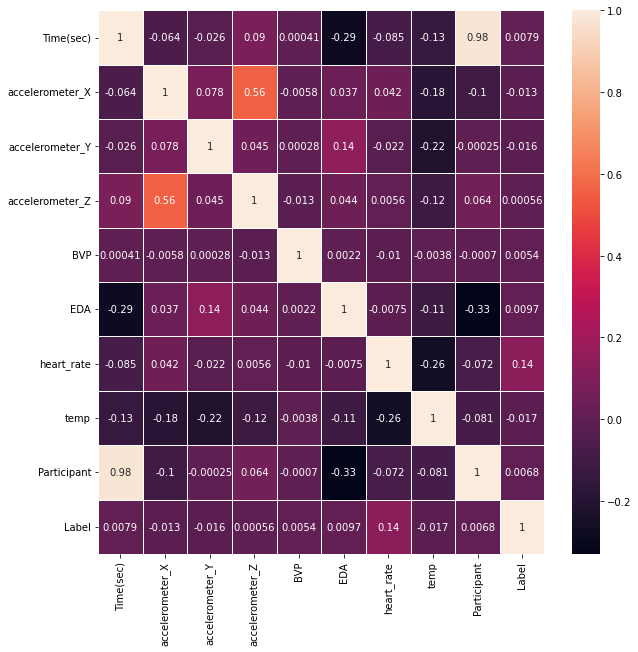

In [44]:
"""Heat map is a visual representation of correlation table"""
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(down_final_df1.corr(), linewidth=0.8,annot = True)
plt.show()

# Upsamling

In [90]:
"""Separate Zeros and Ones then upsampling the 1's and concat them together to balance the data"""
z_final_df1 = final_df1[final_df1['Label'] == 0]
o_final_df1 = final_df1[final_df1['Label'] == 1]

In [110]:
"""Split data for fitting into smote"""
X = final_df1.drop('Label',axis = 1) #"""select all rows and first 8 columns which are the attributes"""
Y = final_df1['Label']   #"""select all rows and the 8th column which is the classification "Yes", "No" for diabeties"""
test_size = 0.30 #"""taking 70:30 training and test set"""
seed = 7  #"""Random numbmer seeding for reapeatability of the code"""
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [118]:
print("Before Upsampling 1's:- ",o_final_df1.shape[0])

"""Synthetic Minority Over Sampling Technique AKA SMOTE"""
sm = SMOTE()   
dependent, label = sm.fit_resample(X_train, y_train.ravel())
print("After UpSampling 1's:- {}".format(sum(label==1)))

Before Upsampling 1's:-  36815
After UpSampling 1's:- 53064


In [126]:
up_final_df1 = dependent.copy()
up_final_df1['Label'] = label

In [127]:
up_final_df1.head()

Time(sec)  accelerometer_X  accelerometer_Y  accelerometer_Z    BVP  \
0  1646647109            -23.0              3.0             59.0   0.08   
1  1645457898            -34.0              3.0             55.0   6.52   
2  1644227789             -4.0            -13.0             43.0  -5.90   
3  1644834163             -9.0             -5.0             63.0  38.08   
4  1646660524            -63.0             -4.0            -16.0 -14.60   

        EDA  heart_rate   temp  Participant  Label  
0  0.221657       74.35  27.91           27      1  
1  0.595053       83.08  26.83           18      0  
2  0.316775       69.42  35.09            2      0  
3  0.221670       69.77  28.73            6      0  
4  0.540885       84.82  31.13           30      0

In [128]:
up_final_df1['Label'].value_counts()

1    53064
0    53064
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

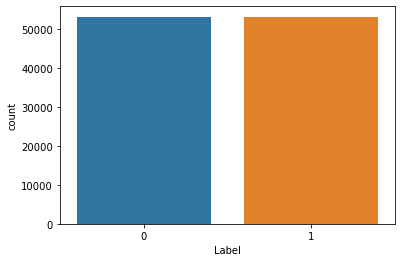

In [130]:
sns.countplot(up_final_df1['Label'])

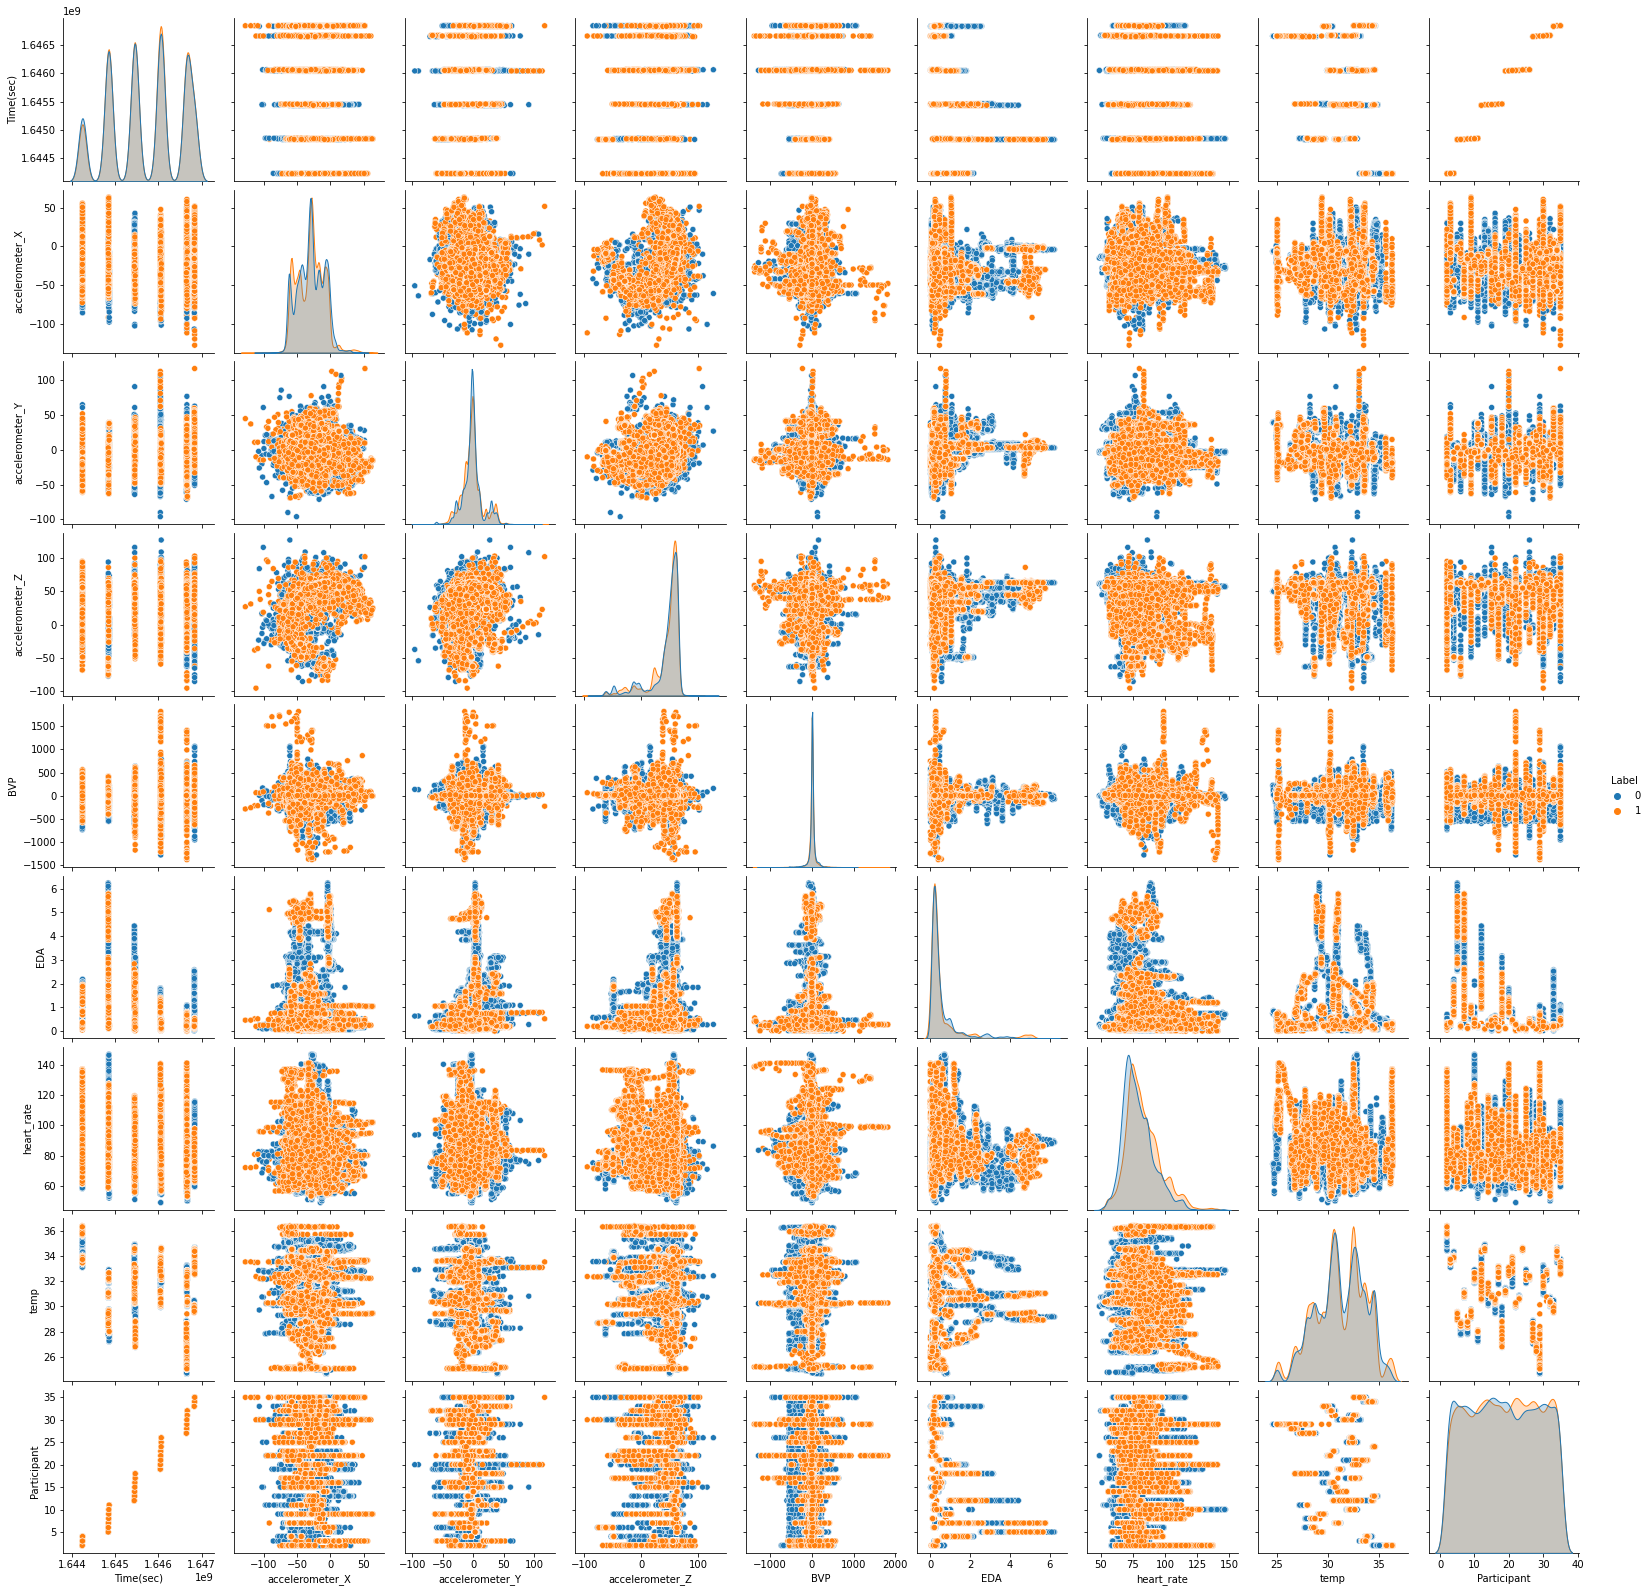

In [135]:
sns.pairplot(up_final_df1, hue = 'Label')

# skewed data

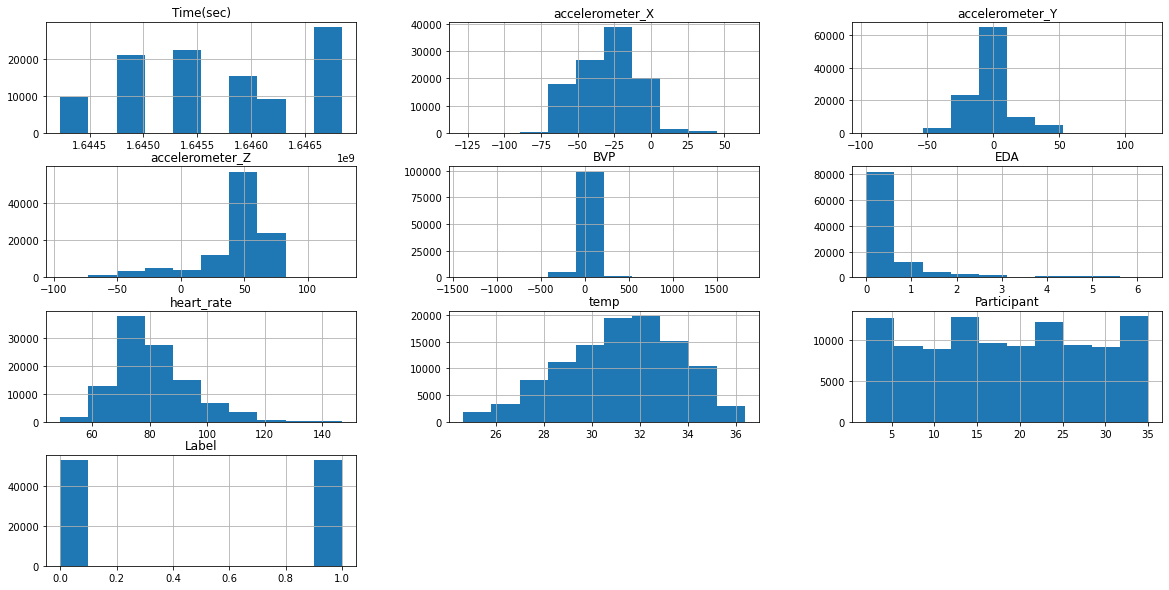

In [131]:
"""Histogram plot helps us figure out which data attribute is skewed left or right.
Here for ex EDA is right skewed data and temp is left skewed data"""
up_final_df1.hist(figsize = (20,10))
plt.show()

# Outlier

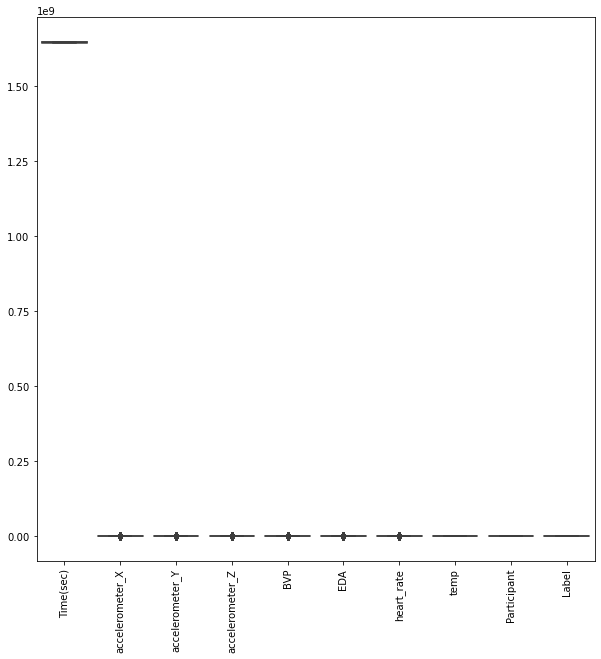

In [132]:
"""Box plot helps us find the outlier which will be handled while modeling by z-score"""
plt.figure(figsize=(10,10))
sns.boxplot(data=up_final_df1)
plt.xticks(rotation=90)
plt.show()

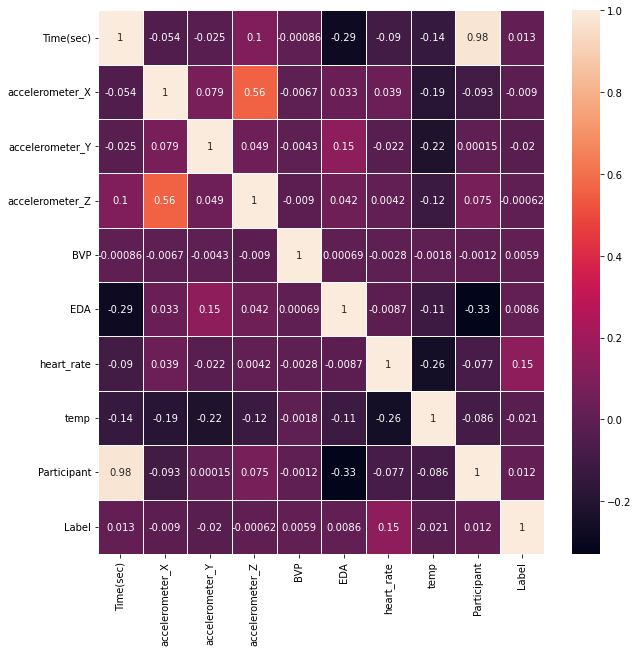

In [134]:
"""Heat map is a visual representation of correlation table"""
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(up_final_df1.corr(), linewidth=0.8,annot = True)
plt.show()

# METHOD-2 OF PREPROCESSING

In [1]:
import pandas as pd
import numpy as np

def Data_Reader(x):
    
    #DATA READING IN LOOP
    """ Reading data folder by folder in for loop by manual string intervention and if loop for x<10 because it shoudl
    generate values like 01,02,03... and after 9 it will generate 10,11,12..."""
    
    if x<10:
        s01_ACC = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/ACC.csv')
        s01_BVP = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/BVP.csv')
        s01_EDA = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/EDA.csv')
        s01_HR = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/HR.csv')
        s01_IBI = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/IBI.csv')
        s01_tags_S01 = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/tags_S0'+str(x)+'.csv')
        s01_TEMP = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S0'+str(x)+'/TEMP.csv')
    else:
        s01_ACC = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/ACC.csv')
        s01_BVP = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/BVP.csv')
        s01_EDA = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/EDA.csv')
        s01_HR = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/HR.csv')
        s01_IBI = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/IBI.csv')
        s01_tags_S01 = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/tags_S'+str(x)+'.csv')
        s01_TEMP = pd.read_csv('F:/Subject Assignment/Keerthan/Code/Stress-Predict-Dataset-main/Raw_data/S'+str(x)+'/TEMP.csv')
    
    #Intersection of each index
    """ Here The data is is picked out where the the index of each column has some value, i.e by doing
    intersection, only index which has all the values available will be picked out. .join operation does the same, but
    wanted to try out intersection which does the same job. This was done different from fill the nan 
    values which is done in method-2 """
    idx = s01_ACC.index.intersection(s01_BVP.index).intersection(s01_EDA.index).intersection(s01_HR.index).intersection(s01_IBI.index).intersection(s01_TEMP.index)
    
    #Renaming each dataframe 
    """Renaming the columns to our fitting so we can merge all the files under one name"""
    s01_ACC.rename({s01_ACC.columns[0]:'accelerometer_X',s01_ACC.columns[1]:'accelerometer_Y',s01_ACC.columns[2]:'accelerometer_Z'},axis = 1,inplace = True)
    s01_BVP.rename({s01_BVP.columns[0]:'BVP'},axis = 1,inplace = True)
    s01_EDA.rename({s01_EDA.columns[0]:'EDA'},axis = 1,inplace = True)
    s01_HR.rename({s01_HR.columns[0]:'heart_rate'},axis = 1,inplace=True)
    s01_IBI.rename({s01_IBI.columns[0]:'IBI_0',s01_IBI.columns[1]:'IBI_1'},axis = 1,inplace = True)
    s01_TEMP.rename({s01_TEMP.columns[0]:'temp'},axis = 1,inplace = True)
    
    #create new dataframe for each subjects
    global new_before
    new_before = pd.DataFrame()
    
    
    #creating and merging the data into new dataframe 
    """Now we have picked out only the common index from intersection which the index has all the values"""
    new_before['accelerometer_X'] = s01_ACC.loc[idx]['accelerometer_X']
    new_before['accelerometer_Y'] = s01_ACC.loc[idx]['accelerometer_Y']
    new_before['accelerometer_Z'] = s01_ACC.loc[idx]['accelerometer_Z']
    new_before["BVP"] = s01_BVP.loc[idx]
    new_before['EDA'] = s01_EDA.loc[idx]
    new_before['heart_rate'] = s01_HR.loc[idx]
    new_before['IBI_0'] = s01_IBI.loc[idx]['IBI_0']
    new_before['IBI_1'] = s01_IBI.loc[idx]['IBI_1']
    new_before['temp'] = s01_TEMP.loc[idx]
    
    """created a subject column because to differenciate the data of which subjects"""
    if x<10:
        new_before['Subject'] = 'S0'+str(x)
    else:
        new_before['Subject'] = 'S'+str(x)
    
    #new_before.to_csv('Subject'+str(x)+'.csv')

"""There are 35 subjects data which means i have to loop through 35 folders to read the data and concat each of it after processing"""
new = pd.DataFrame() 
for i in range(1,35):
    Data_Reader(i)
    new = pd.concat([new,new_before],ignore_index = True)
    
"""Finally this is a classification problem and we need to create a output label so, from reading the journal paper of the 
data, the stress is observed when the participants are given tasks and questionnaires that there is higher level of ppg sensor
, heart_rate, blood volume pressure, and less interval between heart beats so took these attribute and if the attribute crosses
above 25% of the total value then that moment is labeled as 1 aka stressed else 0 aka not stressed which means not induced in any
activity or questionnaires. (could have used np.where or .loc == or this .map function results are same)"""

#Classification Labeling    
def labeling(a,b,c,d,e,f):
    if a > new['accelerometer_X'].describe()[4] and b > new['accelerometer_Y'].describe()[4] and c > new['accelerometer_Z'].describe()[4] and d > new['BVP'].describe()[4] and e > new['heart_rate'].describe()[4] and f > new['IBI_1'].describe()[4]:
        return 1
    else:
        return 0

new['Label'] = np.vectorize(labeling)(new['accelerometer_X'], new['accelerometer_Y'], new['accelerometer_Z'], new['BVP'], new['heart_rate'], new['IBI_1'])

In [2]:
new

accelerometer_X  accelerometer_Y  accelerometer_Z    BVP       EDA  \
0                32.0             32.0             32.0  64.00  4.000000   
1                -2.0             43.0             43.0   0.00  0.000000   
2                -2.0             44.0             46.0   0.00  0.112750   
3                 2.0             44.0             47.0   0.00  0.166563   
4                 3.0             43.0             44.0   0.00  0.167844   
...               ...              ...              ...    ...       ...   
1255            -15.0             16.0             60.0  19.21  0.221657   
1256            -14.0             16.0             61.0  18.11  0.220376   
1257            -16.0             16.0             59.0  17.31  0.221657   
1258            -16.0             16.0             58.0  17.18  0.221657   
1259            -17.0             17.0             59.0  17.76  0.221657   

      heart_rate        IBI_0     IBI_1   temp Subject  Label  
0           1.00    35.484375  0.890625   4.00     S01      0  
1          83.00    36.343750  0.859375  28.39     S01      0  
2          83.00    37.296875  0.953125  28.39     S01      0  
3          72.67    38.187500  0.890625  28.39     S01      0  
4          87.00    39.046875  0.859375  28.39     S01      0  
...          ...          ...       ...    ...     ...    ...  
1255       80.72  2844.031250  0.656250  28.49     S01      0  
1256       80.68  2844.765625  0.734375  28.49     S01      0  
1257       80.60  2845.437500  0.671875  28.51     S01      0  
1258       80.52  2846.062500  0.625000  28.51     S01      0  
1259       80.47  2856.468750  1.218750  28.51     S01      1  

[1260 rows x 11 columns]

In [4]:
new.shape

(51393, 11)

In [5]:
"""Checking the value count of 1's and 0's to get if the data is classification label is imbalanced or not"""
new['Label'].value_counts()

0    41543
1     9850
Name: Label, dtype: int64

In [ ]:
"""saved the csv so dont have to execute again and again."""

#new.to_csv('Preprocessed_data.csv')

# Basic EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('Preprocessed_data.csv')

In [3]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [4]:
df.shape

(51393, 11)

In [5]:
df.head()

accelerometer_X  accelerometer_Y  accelerometer_Z   BVP       EDA  \
0             32.0             32.0             32.0  64.0  4.000000   
1             -2.0             43.0             43.0   0.0  0.000000   
2             -2.0             44.0             46.0   0.0  0.112750   
3              2.0             44.0             47.0   0.0  0.166563   
4              3.0             43.0             44.0   0.0  0.167844   

   heart_rate      IBI_0     IBI_1   temp Subject  Label  
0        1.00  35.484375  0.890625   4.00     S01      0  
1       83.00  36.343750  0.859375  28.39     S01      0  
2       83.00  37.296875  0.953125  28.39     S01      1  
3       72.67  38.187500  0.890625  28.39     S01      1  
4       87.00  39.046875  0.859375  28.39     S01      0

In [6]:
df.describe()

accelerometer_X  accelerometer_Y  accelerometer_Z           BVP  \
count     51393.000000     51393.000000     51393.000000  51393.000000   
mean        -24.803767         0.279260        47.195396      0.239871   
std          19.304064        15.532319        25.634773     90.279148   
min        -128.000000       -96.000000       -85.000000   -909.270000   
25%         -37.000000        -6.000000        45.000000    -15.340000   
50%         -24.000000        -2.000000        56.000000      3.090000   
75%         -10.000000         4.000000        62.000000     23.020000   
max          64.000000       121.000000       127.000000   1066.520000   

                EDA    heart_rate         IBI_0         IBI_1          temp  \
count  51393.000000  51393.000000  51393.000000  51393.000000  51393.000000   
mean       0.613075     80.326257   1523.679667      0.765257     30.952039   
std        1.060776     12.458876    954.572396      0.132125      2.584531   
min        0.000000      1.000000     11.484375      0.312500      4.000000   
25%        0.162729     71.700000    696.359375      0.671875     28.790000   
50%        0.238313     78.030000   1406.093750      0.750000     30.870000   
75%        0.530738     86.880000   2361.968750      0.843750     33.370000   
max        6.237679    123.280000   3469.453125      1.703125     35.310000   

              Label  
count  51393.000000  
mean       0.191660  
std        0.393611  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [7]:
"""no null values due to index intersection of all valuesa available"""
df.isnull().sum()

accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
BVP                0
EDA                0
heart_rate         0
IBI_0              0
IBI_1              0
temp               0
Subject            0
Label              0
dtype: int64

In [8]:
"""no duplicates values due to index intersection of all valuesa available"""
df.duplicated().sum()

0

# Imbalance data

In [9]:
"""the data is heavely imbalanced which is handled by downsampling in the later stage"""
#data is imbalanced
df.Label.value_counts()

0    41543
1     9850
Name: Label, dtype: int64

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

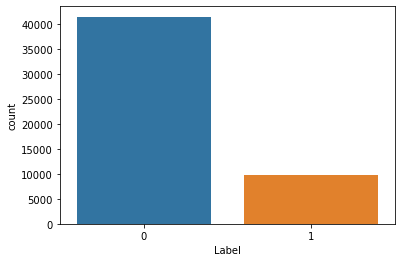

In [10]:
sns.countplot(df['Label'])

In [11]:
df.groupby(['Label']).count()

accelerometer_X  accelerometer_Y  accelerometer_Z    BVP    EDA  \
Label                                                                    
0                41543            41543            41543  41543  41543   
1                 9850             9850             9850   9850   9850   

       heart_rate  IBI_0  IBI_1   temp  Subject  
Label                                            
0           41543  41543  41543  41543    41543  
1            9850   9850   9850   9850     9850

In [12]:
"""seperatiung 0's and 1's because i have to downsample the 0's and the merge both again"""
zero = df[df['Label'] == 0].index
one = df[df['Label'] == 1].index

In [13]:
len(zero),len(one)

(41543, 9850)

In [14]:
"""downsamoling is basically dropping the values of higher label randomly"""
random_sampling = np.random.choice( zero, len(zero) - 31000 , replace=False)

In [15]:
final_index = np.concatenate([one,random_sampling])

In [16]:
final_df = df.loc[final_index]

In [17]:
"""reset index after droping some values"""
final_df.reset_index(drop = True,inplace = True)

In [18]:
final_df.shape

(20393, 11)

In [19]:
final_df.head()

accelerometer_X  accelerometer_Y  accelerometer_Z  BVP       EDA  \
0             -2.0             44.0             46.0  0.0  0.112750   
1              2.0             44.0             47.0  0.0  0.166563   
2             -3.0             45.0             46.0  0.0  0.166563   
3             -6.0             42.0             46.0  0.0  0.165282   
4             -4.0             42.0             47.0  0.0  0.166563   

   heart_rate      IBI_0     IBI_1   temp Subject  Label  
0       83.00  37.296875  0.953125  28.39     S01      1  
1       72.67  38.187500  0.890625  28.39     S01      1  
2       80.83  40.656250  0.796875  28.39     S01      1  
3       82.67  42.906250  0.781250  28.39     S01      1  
4       83.10  43.750000  0.843750  28.39     S01      1

In [20]:
final_df['Label'].value_counts()

0    10543
1     9850
Name: Label, dtype: int64

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

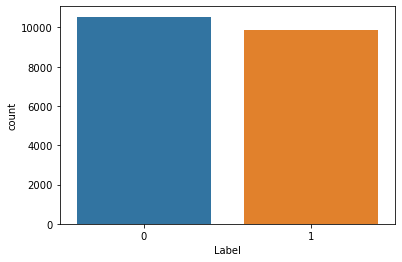

In [21]:
sns.countplot(final_df['Label'])

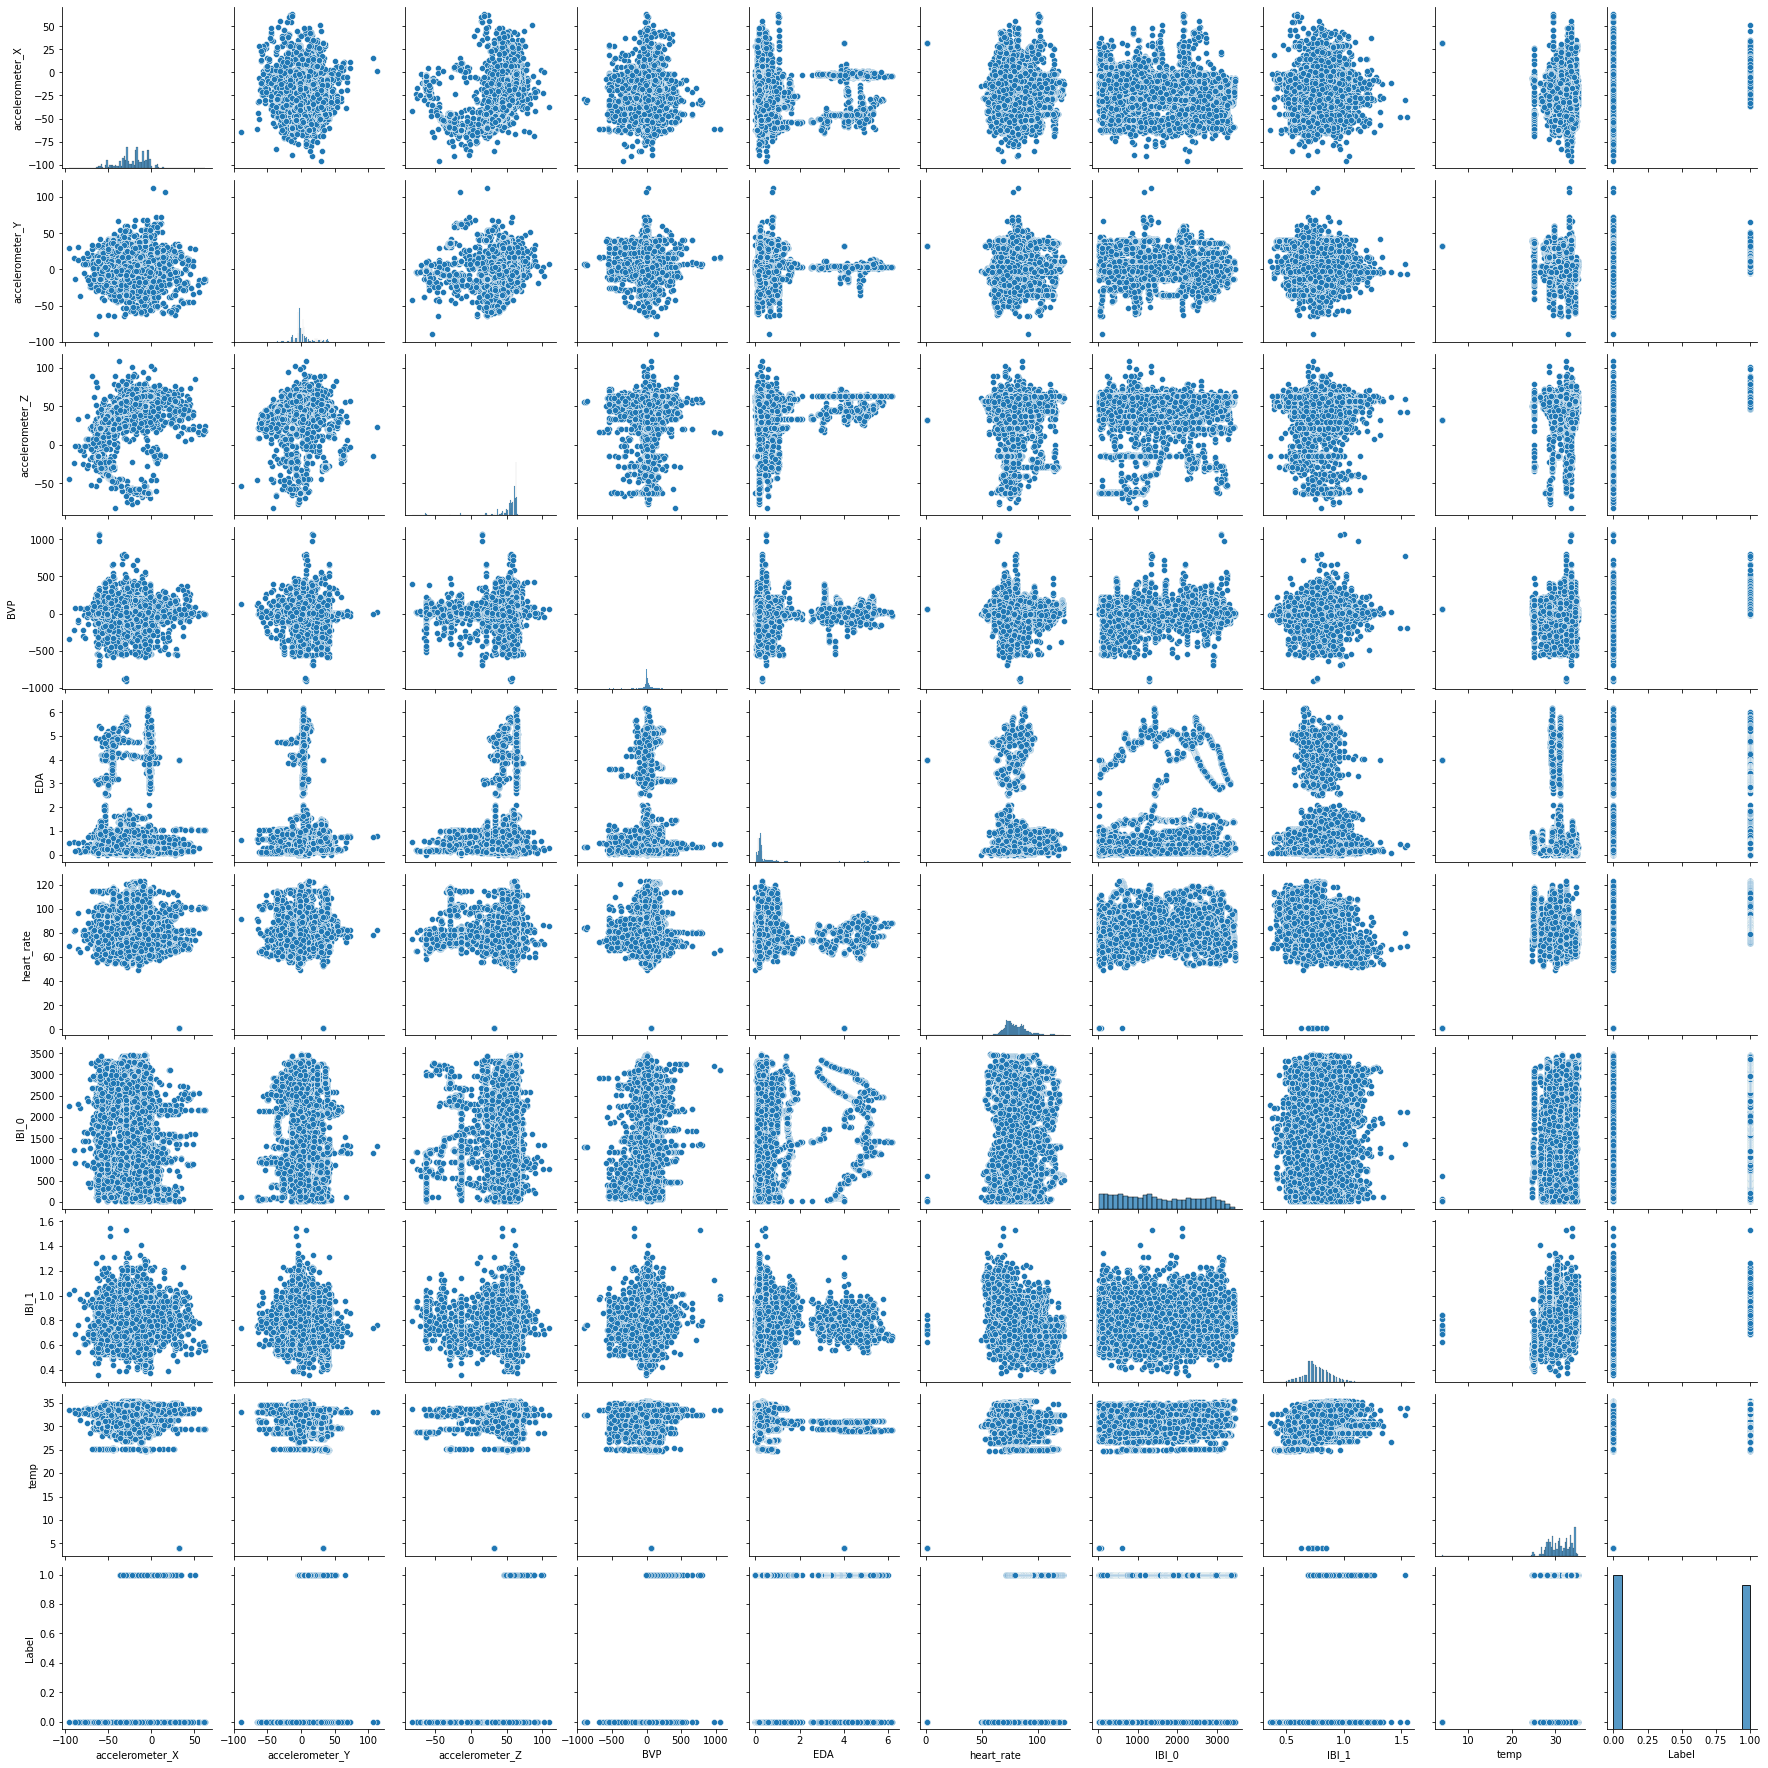

In [22]:
"""Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical."""
sns.pairplot(final_df)

# skewed data

array([[<AxesSubplot:title={'center':'accelerometer_X'}>,
        <AxesSubplot:title={'center':'accelerometer_Y'}>,
        <AxesSubplot:title={'center':'accelerometer_Z'}>],
       [<AxesSubplot:title={'center':'BVP'}>,
        <AxesSubplot:title={'center':'EDA'}>,
        <AxesSubplot:title={'center':'heart_rate'}>],
       [<AxesSubplot:title={'center':'IBI_0'}>,
        <AxesSubplot:title={'center':'IBI_1'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'Label'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

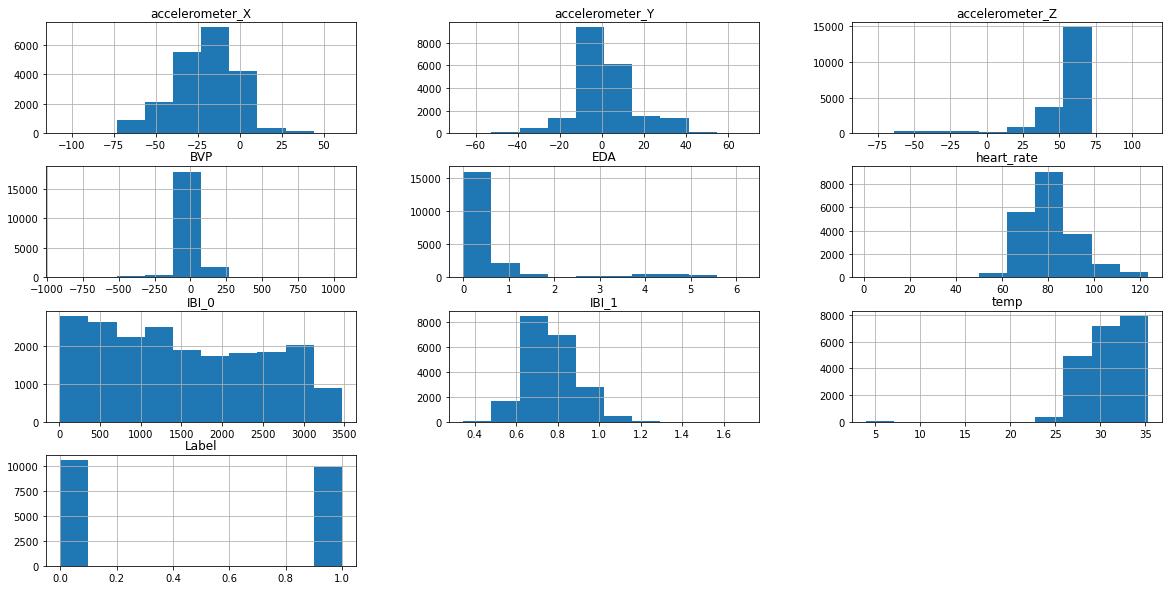

In [176]:
"""Histogram plot helps us figure out which data attribute is skewed left or right.
Here for ex EDA is right skewed data and temp is left skewed data"""
final_df.hist(figsize = (20,10))

In [177]:
"""Fixinf skewed data. left and right can be fixed by chcking use of .sqrt or .log function"""
final_df['EDA'] = np.sqrt(final_df['EDA'])

In [178]:
final_df.head()

accelerometer_X  accelerometer_Y  accelerometer_Z  BVP       EDA  \
0             -2.0             44.0             46.0  0.0  0.335783   
1              2.0             44.0             47.0  0.0  0.408121   
2             -3.0             45.0             46.0  0.0  0.408121   
3             -6.0             42.0             46.0  0.0  0.406549   
4             -4.0             42.0             47.0  0.0  0.408121   

   heart_rate      IBI_0     IBI_1   temp Subject  Label  
0       83.00  37.296875  0.953125  28.39     S01      1  
1       72.67  38.187500  0.890625  28.39     S01      1  
2       80.83  40.656250  0.796875  28.39     S01      1  
3       82.67  42.906250  0.781250  28.39     S01      1  
4       83.10  43.750000  0.843750  28.39     S01      1

array([[<AxesSubplot:title={'center':'accelerometer_X'}>,
        <AxesSubplot:title={'center':'accelerometer_Y'}>,
        <AxesSubplot:title={'center':'accelerometer_Z'}>],
       [<AxesSubplot:title={'center':'BVP'}>,
        <AxesSubplot:title={'center':'EDA'}>,
        <AxesSubplot:title={'center':'heart_rate'}>],
       [<AxesSubplot:title={'center':'IBI_0'}>,
        <AxesSubplot:title={'center':'IBI_1'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'Label'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

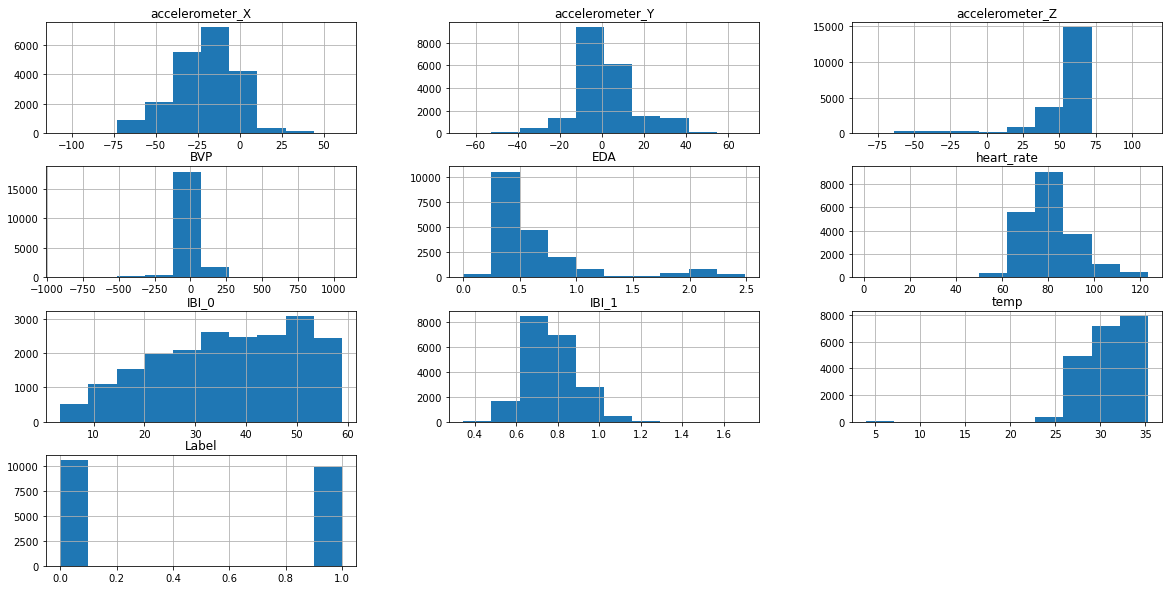

In [182]:
final_df.hist(figsize = (20,10))

In [180]:
final_df.corr()

accelerometer_X  accelerometer_Y  accelerometer_Z       BVP  \
accelerometer_X         1.000000         0.106890         0.409087  0.042790   
accelerometer_Y         0.106890         1.000000        -0.003820  0.034339   
accelerometer_Z         0.409087        -0.003820         1.000000  0.044462   
BVP                     0.042790         0.034339         0.044462  1.000000   
EDA                     0.064846         0.054850         0.057390 -0.005517   
heart_rate              0.097871         0.041886         0.092710 -0.013642   
IBI_0                  -0.153375        -0.128154         0.042454 -0.029700   
IBI_1                  -0.095556        -0.068573        -0.039696  0.028721   
temp                   -0.060634        -0.230177         0.064732  0.036947   
Label                   0.356443         0.186019         0.359763  0.221664   

                      EDA  heart_rate     IBI_0     IBI_1      temp     Label  
accelerometer_X  0.064846    0.097871 -0.153375 -0.095556 -0.060634  0.356443  
accelerometer_Y  0.054850    0.041886 -0.128154 -0.068573 -0.230177  0.186019  
accelerometer_Z  0.057390    0.092710  0.042454 -0.039696  0.064732  0.359763  
BVP             -0.005517   -0.013642 -0.029700  0.028721  0.036947  0.221664  
EDA              1.000000    0.083712  0.111562 -0.089172 -0.222641  0.073111  
heart_rate       0.083712    1.000000  0.056408 -0.516038 -0.199368  0.113366  
IBI_0            0.111562    0.056408  1.000000  0.083398 -0.038175  0.000844  
IBI_1           -0.089172   -0.516038  0.083398  1.000000  0.203808  0.095130  
temp            -0.222641   -0.199368 -0.038175  0.203808  1.000000  0.031451  
Label            0.073111    0.113366  0.000844  0.095130  0.031451  1.000000

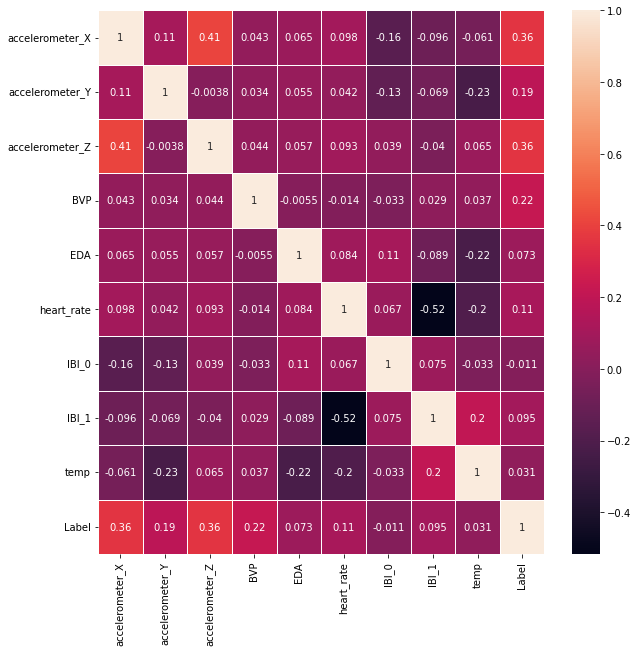

In [196]:
"""Heat map is a visual representation of correlation table"""
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(final_df.corr(), linewidth=0.8,annot = True)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'accelerometer_X'),
  Text(1, 0, 'accelerometer_Y'),
  Text(2, 0, 'accelerometer_Z'),
  Text(3, 0, 'BVP'),
  Text(4, 0, 'EDA'),
  Text(5, 0, 'heart_rate'),
  Text(6, 0, 'IBI_0'),
  Text(7, 0, 'IBI_1'),
  Text(8, 0, 'temp'),
  Text(9, 0, 'Label')])

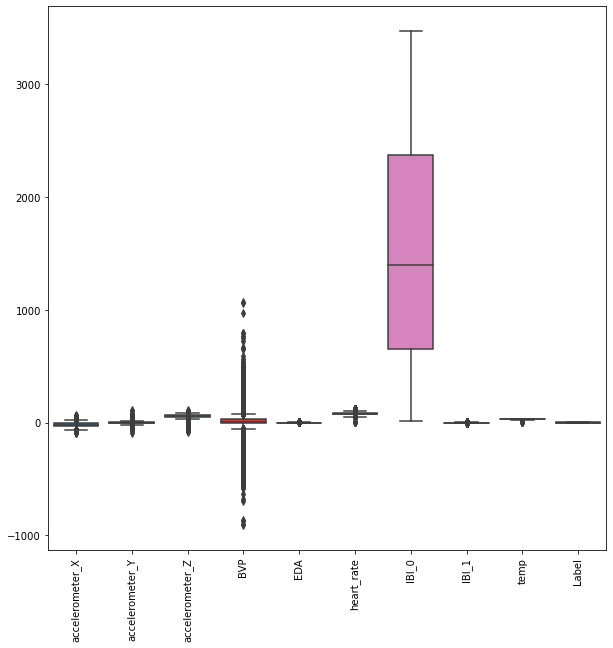

In [27]:
"""Box plot helps us find the outlier which will be handled while modeling by z-score"""
plt.figure(figsize=(10,10))
sns.boxplot(data=final_df)
plt.xticks(rotation=90)

# METHOD-3 OF PREPROCESSING

In [221]:
import os
import pandas as pd
import numpy as np

# Script to combine all signals
# Set the data path
"""Path of the data"""
DATA_PATH = "F:\Subject Assignment\Keerthan\Code\Stress-Predict-Dataset-main"

"""Path to save the merged individual attribute"""
# Set the save path
SAVE_PATH = "F:\Subject Assignment\Keerthan"

# Create the save path directory if it doesn't exist
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

final_columns = {
    'ACC': ['id', 'X', 'Y', 'Z', 'datetime'],
    'BVP': ['id', 'BVP', 'datetime'],
    'EDA': ['id', 'EDA', 'datetime'],
    'HR': ['id', 'HR', 'datetime'],
    'IBI': ['id', 'Initial', 'Interval', 'datetime'],
    'TEMP': ['id', 'TEMP', 'datetime']
}

names = {
    'ACC.csv': ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z'],
    'BVP.csv': ['BVP'],
    'EDA.csv': ['EDA'],
    'HR.csv': ['HR'], 
    'IBI.csv': ['IBI_0', 'IBI_1'],
    'TEMP.csv': ['TEMP']
}

desired_signals = ['ACC.csv', 'BVP.csv', 'EDA.csv', 'HR.csv', 'IBI.csv', 'TEMP.csv']

acc = pd.DataFrame(columns=final_columns['ACC'])
bvp = pd.DataFrame(columns=final_columns['BVP'])
eda = pd.DataFrame(columns=final_columns['EDA'])
hr = pd.DataFrame(columns=final_columns['HR'])
ibi = pd.DataFrame(columns=final_columns['IBI'])
temp = pd.DataFrame(columns=final_columns['TEMP'])

"""create datetime attribute"""
def process_df(df, file):
    start_timestamp = df.iloc[0,0]
    sample_rate = df.iloc[1,0]
    new_df = pd.DataFrame(df.iloc[2:].values, columns=df.columns)
    new_df['id'] =  file[-2:]
    new_df['datetime'] = [(start_timestamp + i/sample_rate) for i in range(len(new_df))]
    return new_df

"""Merge all the attribute of different folders into single csv with datetime and id"""
#Combine data with same names in multiple folders
for folder in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder)
    if os.path.isdir(folder_path):
        print(f'Processing {folder}')
        for sub_folder in os.listdir(folder_path):
            sub_folder_path = os.path.join(folder_path, sub_folder)
            if os.path.isdir(sub_folder_path):
                print(f'Processing {sub_folder} in {folder}')
                for signal in os.listdir(sub_folder_path):
                    if os.path.isfile(os.path.join(sub_folder_path, signal)):
                        if signal in desired_signals:
                            df = pd.read_csv(os.path.join(sub_folder_path, signal), names=names[signal], header=None)
                            if not df.empty:
                                if signal == 'ACC.csv':
                                    acc = pd.concat([acc, process_df(df, folder)])
                                    print("ACC df:", acc)
                                if signal == 'BVP.csv':
                                    bvp = pd.concat([bvp, process_df(df, folder)])
                                    print("BVP df:", bvp)
                                if signal == 'EDA.csv':
                                    eda = pd.concat([eda, process_df(df, folder)])
                                    print("EDA df:", eda)
                                if signal == 'HR.csv':
                                    hr = pd.concat([hr, process_df(df, folder)])
                                    print("HR df:", hr)
                                if signal == 'IBI.csv':
                                    ibi = pd.concat([ibi, process_df(df, folder)])
                                    print("IBI df:", ibi)
                                if signal == 'TEMP.csv':
                                    temp = pd.concat([temp, process_df(df, folder)])
                                    print("TEMP df:", temp)
                            else:
                                print(f"{signal} in {sub_folder} is empty")
                    else:
                        print(f"{signal} in {sub_folder} is not a file")
            else:
                print(f"{sub_folder} in {folder} is not a directory")
    else:
        print(f"{folder} is not a directory")

"""Saving the csv so dont have to execute again and again"""
#Saving combined data
print('Saving Data ...')
acc.to_csv(os.path.join(SAVE_PATH, 'combined_acc.csv'), index=False)
bvp.to_csv(os.path.join(SAVE_PATH, 'combined_bvp.csv'), index=False)
eda.to_csv(os.path.join(SAVE_PATH, 'combined_eda.csv'), index=False)
hr.to_csv(os.path.join(SAVE_PATH, 'combined_hr.csv'), index=False)
ibi.to_csv(os.path.join(SAVE_PATH, 'combined_ibi.csv'), index=False)
temp.to_csv(os.path.join(SAVE_PATH, 'combined_temp.csv'), index=False)

LICENSE is not a directory
Processing Processed_data
Improved_All_Combined_hr_rsp_binary.csv in Processed_data is not a directory
Questionnaires_scores.xlsx in Processed_data is not a directory
Readme in Processed_data is not a directory
Time_logs.xlsx in Processed_data is not a directory
Processing Raw_data
Readme in Raw_data is not a directory
Processing S01 in Raw_data
ACC df:         id    X    Y    Z          datetime  accelerometer_X  accelerometer_Y  \
0       ta  NaN  NaN  NaN      1644226061.0             -2.0             43.0   
1       ta  NaN  NaN  NaN  1644226061.03125             -2.0             44.0   
2       ta  NaN  NaN  NaN   1644226061.0625              2.0             44.0   
3       ta  NaN  NaN  NaN  1644226061.09375              3.0             43.0   
4       ta  NaN  NaN  NaN    1644226061.125              1.0             43.0   
...     ..  ...  ...  ...               ...              ...              ...   
104305  ta  NaN  NaN  NaN  1644229320.53125       

ACC df:         id    X    Y    Z          datetime  accelerometer_X  accelerometer_Y  \
0       ta  NaN  NaN  NaN      1644226061.0             -2.0             43.0   
1       ta  NaN  NaN  NaN  1644226061.03125             -2.0             44.0   
2       ta  NaN  NaN  NaN   1644226061.0625              2.0             44.0   
3       ta  NaN  NaN  NaN  1644226061.09375              3.0             43.0   
4       ta  NaN  NaN  NaN    1644226061.125              1.0             43.0   
...     ..  ...  ...  ...               ...              ...              ...   
106201  ta  NaN  NaN  NaN  1644234690.78125             22.0             12.0   
106202  ta  NaN  NaN  NaN   1644234690.8125             20.0             13.0   
106203  ta  NaN  NaN  NaN  1644234690.84375             21.0             12.0   
106204  ta  NaN  NaN  NaN    1644234690.875             21.0             12.0   
106205  ta  NaN  NaN  NaN  1644234690.90625             20.0             14.0   

        acceleromet

HR df:       id     HR      datetime
0     ta   83.0  1644226071.0
1     ta   83.0  1644226072.0
2     ta  72.67  1644226073.0
3     ta   87.0  1644226074.0
4     ta   80.0  1644226075.0
...   ..    ...           ...
3263  ta  86.25  1644833198.0
3264  ta  86.17  1644833199.0
3265  ta  86.12  1644833200.0
3266  ta  86.08  1644833201.0
3267  ta  86.05  1644833202.0

[16910 rows x 3 columns]
IBI df:       id Initial Interval           datetime        IBI_0     IBI_1
0     ta     NaN      NaN       1644226061.0     36.34375  0.859375
1     ta     NaN      NaN  1644226061.028181    37.296875  0.953125
2     ta     NaN      NaN  1644226061.056363      38.1875  0.890625
3     ta     NaN      NaN  1644226061.084544    39.046875  0.859375
4     ta     NaN      NaN  1644226061.112726    39.859375  0.812500
...   ..     ...      ...                ...          ...       ...
2372  ta     NaN      NaN  1644830046.934137       3138.5  0.750000
2373  ta     NaN      NaN  1644830046.985542    3139.31

ACC df:         id    X    Y    Z          datetime  accelerometer_X  accelerometer_Y  \
0       ta  NaN  NaN  NaN      1644226061.0             -2.0             43.0   
1       ta  NaN  NaN  NaN  1644226061.03125             -2.0             44.0   
2       ta  NaN  NaN  NaN   1644226061.0625              2.0             44.0   
3       ta  NaN  NaN  NaN  1644226061.09375              3.0             43.0   
4       ta  NaN  NaN  NaN    1644226061.125              1.0             43.0   
...     ..  ...  ...  ...               ...              ...              ...   
100567  ta  NaN  NaN  NaN  1644843886.71875            -16.0             -4.0   
100568  ta  NaN  NaN  NaN     1644843886.75            -13.0             -3.0   
100569  ta  NaN  NaN  NaN  1644843886.78125            -15.0             -3.0   
100570  ta  NaN  NaN  NaN   1644843886.8125            -15.0             -4.0   
100571  ta  NaN  NaN  NaN  1644843886.84375            -15.0             -3.0   

        acceleromet

EDA df:        id       EDA       datetime
0      ta       0.0   1644226061.0
1      ta   0.11275  1644226061.25
2      ta  0.166563   1644226061.5
3      ta  0.167844  1644226061.75
4      ta  0.167844   1644226062.0
...    ..       ...            ...
12151  ta  0.309049  1644847496.75
12152  ta  0.302643   1644847497.0
12153  ta  0.306487  1644847497.25
12154  ta  0.305205   1644847497.5
12155  ta  0.306487  1644847497.75

[132090 rows x 3 columns]
HR df:       id     HR      datetime
0     ta   83.0  1644226071.0
1     ta   83.0  1644226072.0
2     ta  72.67  1644226073.0
3     ta   87.0  1644226074.0
4     ta   80.0  1644226075.0
...   ..    ...           ...
3023  ta  76.77  1644847492.0
3024  ta  76.83  1644847493.0
3025  ta  76.73  1644847494.0
3026  ta  76.63  1644847495.0
3027  ta  76.53  1644847496.0

[32926 rows x 3 columns]
IBI df:       id Initial Interval           datetime        IBI_0     IBI_1
0     ta     NaN      NaN       1644226061.0     36.34375  0.859375
1     ta

ACC df:         id    X    Y    Z          datetime  accelerometer_X  accelerometer_Y  \
0       ta  NaN  NaN  NaN      1644226061.0             -2.0             43.0   
1       ta  NaN  NaN  NaN  1644226061.03125             -2.0             44.0   
2       ta  NaN  NaN  NaN   1644226061.0625              2.0             44.0   
3       ta  NaN  NaN  NaN  1644226061.09375              3.0             43.0   
4       ta  NaN  NaN  NaN    1644226061.125              1.0             43.0   
...     ..  ...  ...  ...               ...              ...              ...   
107071  ta  NaN  NaN  NaN  1645445992.96875             -5.0            -26.0   
107072  ta  NaN  NaN  NaN      1645445993.0             -1.0            -25.0   
107073  ta  NaN  NaN  NaN  1645445993.03125              5.0            -25.0   
107074  ta  NaN  NaN  NaN   1645445993.0625             -1.0            -25.0   
107075  ta  NaN  NaN  NaN  1645445993.09375             -7.0            -26.0   

        acceleromet

BVP df:         id     BVP           datetime
0       ta     0.0       1644226061.0
1       ta     0.0  1644226061.015625
2       ta     0.0   1644226061.03125
3       ta     0.0  1644226061.046875
4       ta     0.0    1644226061.0625
...     ..     ...                ...
221326  ta  100.16   1645450447.21875
221327  ta  110.54  1645450447.234375
221328  ta  117.72      1645450447.25
221329  ta  119.34  1645450447.265625
221330  ta  114.85   1645450447.28125

[3201704 rows x 3 columns]
EDA df:        id       EDA       datetime
0      ta       0.0   1644226061.0
1      ta   0.11275  1644226061.25
2      ta  0.166563   1644226061.5
3      ta  0.167844  1644226061.75
4      ta  0.167844   1644226062.0
...    ..       ...            ...
13831  ta  0.089955  1645450446.75
13832  ta   0.10533   1645450447.0
13833  ta  0.109173  1645450447.25
13834  ta  0.107892   1645450447.5
13835  ta  0.106611  1645450447.75

[200106 rows x 3 columns]
HR df:       id     HR      datetime
0     ta   83.0 

ACC df:         id    X    Y    Z          datetime  accelerometer_X  accelerometer_Y  \
0       ta  NaN  NaN  NaN      1644226061.0             -2.0             43.0   
1       ta  NaN  NaN  NaN  1644226061.03125             -2.0             44.0   
2       ta  NaN  NaN  NaN   1644226061.0625              2.0             44.0   
3       ta  NaN  NaN  NaN  1644226061.09375              3.0             43.0   
4       ta  NaN  NaN  NaN    1644226061.125              1.0             43.0   
...     ..  ...  ...  ...               ...              ...              ...   
109489  ta  NaN  NaN  NaN  1645461106.53125             18.0              7.0   
109490  ta  NaN  NaN  NaN   1645461106.5625             18.0              7.0   
109491  ta  NaN  NaN  NaN  1645461106.59375             17.0              8.0   
109492  ta  NaN  NaN  NaN    1645461106.625             18.0              7.0   
109493  ta  NaN  NaN  NaN  1645461106.65625             17.0              7.0   

        acceleromet

BVP df:         id    BVP           datetime
0       ta    0.0       1644226061.0
1       ta    0.0  1644226061.015625
2       ta    0.0   1644226061.03125
3       ta    0.0  1644226061.046875
4       ta    0.0    1644226061.0625
...     ..    ...                ...
217355  ta  25.25  1646045185.171875
217356  ta  32.38    1646045185.1875
217357  ta  37.05  1646045185.203125
217358  ta  40.04   1646045185.21875
217359  ta  42.86  1646045185.234375

[4274996 rows x 3 columns]
EDA df:        id       EDA       datetime
0      ta       0.0   1644226061.0
1      ta   0.11275  1644226061.25
2      ta  0.166563   1644226061.5
3      ta  0.167844  1644226061.75
4      ta  0.167844   1644226062.0
...    ..       ...            ...
13585  ta  1.679178  1646045185.25
13586  ta   1.69071   1646045185.5
13587  ta  1.702242  1646045185.75
13588  ta  1.667646   1646045186.0
13589  ta  1.653551  1646045186.25

[267168 rows x 3 columns]
HR df:       id     HR      datetime
0     ta   83.0  1644226071.

ACC df:        id    X    Y    Z          datetime  accelerometer_X  accelerometer_Y  \
0      ta  NaN  NaN  NaN      1644226061.0             -2.0             43.0   
1      ta  NaN  NaN  NaN  1644226061.03125             -2.0             44.0   
2      ta  NaN  NaN  NaN   1644226061.0625              2.0             44.0   
3      ta  NaN  NaN  NaN  1644226061.09375              3.0             43.0   
4      ta  NaN  NaN  NaN    1644226061.125              1.0             43.0   
...    ..  ...  ...  ...               ...              ...              ...   
98827  ta  NaN  NaN  NaN  1646055357.34375             -3.0             12.0   
98828  ta  NaN  NaN  NaN    1646055357.375             -4.0             12.0   
98829  ta  NaN  NaN  NaN  1646055357.40625             -3.0             12.0   
98830  ta  NaN  NaN  NaN   1646055357.4375             -4.0             12.0   
98831  ta  NaN  NaN  NaN  1646055357.46875             -2.0             12.0   

       accelerometer_Z  
0     

BVP df:         id     BVP           datetime
0       ta     0.0       1644226061.0
1       ta     0.0  1644226061.015625
2       ta     0.0   1644226061.03125
3       ta     0.0  1644226061.046875
4       ta     0.0    1644226061.0625
...     ..     ...                ...
205618  ta  -78.71   1646064361.78125
205619  ta -126.82  1646064361.796875
205620  ta -194.04    1646064361.8125
205621  ta -265.76  1646064361.828125
205622  ta -327.79   1646064361.84375

[5290626 rows x 3 columns]
EDA df:        id       EDA       datetime
0      ta       0.0   1644226061.0
1      ta   0.11275  1644226061.25
2      ta  0.166563   1644226061.5
3      ta  0.167844  1644226061.75
4      ta  0.167844   1644226062.0
...    ..       ...            ...
12847  ta  0.876961  1646064360.75
12848  ta  0.802622   1646064361.0
12849  ta   0.59242  1646064361.25
12850  ta   0.80903   1646064361.5
12851  ta   1.00257  1646064361.75

[330660 rows x 3 columns]
HR df:       id     HR      datetime
0     ta   83.0 

Processing S28 in Raw_data
ACC df:         id    X    Y    Z          datetime  accelerometer_X  accelerometer_Y  \
0       ta  NaN  NaN  NaN      1644226061.0             -2.0             43.0   
1       ta  NaN  NaN  NaN  1644226061.03125             -2.0             44.0   
2       ta  NaN  NaN  NaN   1644226061.0625              2.0             44.0   
3       ta  NaN  NaN  NaN  1644226061.09375              3.0             43.0   
4       ta  NaN  NaN  NaN    1644226061.125              1.0             43.0   
...     ..  ...  ...  ...               ...              ...              ...   
105823  ta  NaN  NaN  NaN  1646658692.96875             55.0             10.0   
105824  ta  NaN  NaN  NaN      1646658693.0             56.0             10.0   
105825  ta  NaN  NaN  NaN  1646658693.03125             54.0              9.0   
105826  ta  NaN  NaN  NaN   1646658693.0625             55.0             11.0   
105827  ta  NaN  NaN  NaN  1646658693.09375             57.0             1

BVP df:         id     BVP           datetime
0       ta     0.0       1644226061.0
1       ta     0.0  1644226061.015625
2       ta     0.0   1644226061.03125
3       ta     0.0  1644226061.046875
4       ta     0.0    1644226061.0625
...     ..     ...                ...
213505  ta  101.69  1646661309.015625
213506  ta  105.84   1646661309.03125
213507  ta  107.49  1646661309.046875
213508  ta  104.41    1646661309.0625
213509  ta   95.82  1646661309.078125

[6350168 rows x 3 columns]
EDA df:        id       EDA       datetime
0      ta       0.0   1644226061.0
1      ta   0.11275  1644226061.25
2      ta  0.166563   1644226061.5
3      ta  0.167844  1644226061.75
4      ta  0.167844   1644226062.0
...    ..       ...            ...
13333  ta  0.475784  1646661306.25
13334  ta  0.475784   1646661306.5
13335  ta  0.483474  1646661306.75
13336  ta  0.538588   1646661307.0
13337  ta  0.570631  1646661307.25

[396882 rows x 3 columns]
HR df:       id     HR      datetime
0     ta   83.0 

IBI df:       id Initial Interval           datetime        IBI_0     IBI_1
0     ta     NaN      NaN       1644226061.0     36.34375  0.859375
1     ta     NaN      NaN  1644226061.028181    37.296875  0.953125
2     ta     NaN      NaN  1644226061.056363      38.1875  0.890625
3     ta     NaN      NaN  1644226061.084544    39.046875  0.859375
4     ta     NaN      NaN  1644226061.112726    39.859375  0.812500
...   ..     ...      ...                ...          ...       ...
1044  ta     NaN      NaN  1646667445.089021  3156.640625  1.296875
1045  ta     NaN      NaN  1646667445.152324   3164.21875  1.187500
1046  ta     NaN      NaN  1646667445.215628  3165.453125  1.234375
1047  ta     NaN      NaN  1646667445.278932  3166.671875  1.218750
1048  ta     NaN      NaN  1646667445.342235  3167.953125  1.281250

[44102 rows x 6 columns]
TEMP df:        id   TEMP       datetime
0      ta  28.39   1644226061.0
1      ta  28.39  1644226061.25
2      ta  28.39   1644226061.5
3      ta  28

ACC df:         id    X    Y    Z          datetime  accelerometer_X  accelerometer_Y  \
0       ta  NaN  NaN  NaN      1644226061.0             -2.0             43.0   
1       ta  NaN  NaN  NaN  1644226061.03125             -2.0             44.0   
2       ta  NaN  NaN  NaN   1644226061.0625              2.0             44.0   
3       ta  NaN  NaN  NaN  1644226061.09375              3.0             43.0   
4       ta  NaN  NaN  NaN    1644226061.125              1.0             43.0   
...     ..  ...  ...  ...               ...              ...              ...   
112729  ta  NaN  NaN  NaN  1646842246.78125            -17.0              1.0   
112730  ta  NaN  NaN  NaN   1646842246.8125            -17.0              2.0   
112731  ta  NaN  NaN  NaN  1646842246.84375            -17.0              1.0   
112732  ta  NaN  NaN  NaN    1646842246.875            -16.0              1.0   
112733  ta  NaN  NaN  NaN  1646842246.90625            -17.0              1.0   

        acceleromet

In [222]:
import pandas as pd
import os

"""location of all combined attribute csv"""
# Set the data path
COMBINED_DATA_PATH = "F:\Subject Assignment\Keerthan"

"""location to save all attribute merged in one csv"""
# Set the save path
SAVE_PATH = "F:\Subject Assignment\Keerthan"

# Create the save path directory if it doesn't exist 
if COMBINED_DATA_PATH != SAVE_PATH:
    os.mkdir(SAVE_PATH)
                                          
print("Reading data ...")
acc, bvp, eda, hr, ibi, temp = None, None, None, None, None, None

signals = ['acc','bvp', 'eda', 'hr','ibi', 'temp']

results = []
for signal in signals:
    df = pd.read_csv(os.path.join(COMBINED_DATA_PATH, f"combined_{signal}.csv"), dtype={'id': str})
    results.append([signal, df])

for i in results:
    globals()[i[0]] = i[1]

# Merge data
print('Merging Data ...')
ids = eda['id'].unique()
columns = ['X', 'Y', 'Z','BVP', 'EDA', 'HR','IBI', 'TEMP', 'id', 'datetime']

results = []
for id in ids:
    print(f"Processing {id}")
    df = pd.DataFrame(columns=columns)

    acc_id = acc[acc['id'] == id]
    bvp_id = bvp[bvp['id'] == id].drop(['id'], axis=1)
    eda_id = eda[eda['id'] == id].drop(['id'], axis=1)
    hr_id = hr[hr['id'] == id].drop(['id'], axis=1)
    ibi_id = ibi[ibi['id'] == id].drop(['id'], axis=1)
    temp_id = temp[temp['id'] == id].drop(['id'], axis=1)

    """Merging on common attribute"""
    df = acc_id.merge(bvp_id, on='datetime', how='outer')
    df = df.merge(eda_id, on='datetime', how='outer')
    df = df.merge(hr_id, on='datetime', how='outer')
    df = df.merge(ibi_id, on='datetime', how='outer')
    df = df.merge(temp_id, on='datetime', how='outer')

    """filling null value with forward and backward fill"""
    #Filling null values with Forward and Backward value imputation
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

    results.append(df)

print(results)
new_df = pd.concat(results, ignore_index=True)

"""saving the final csv so dont have to repeat execution again and again"""
print("Saving data ...")
new_df.to_csv(os.path.join(SAVE_PATH, "merged_data.csv"), index=False)

Reading data ...
Merging Data ...
Processing ta
[          id   X   Y   Z      datetime  accelerometer_X  accelerometer_Y  \
0         ta NaN NaN NaN  1.644226e+09             -2.0             43.0   
1         ta NaN NaN NaN  1.644226e+09             -2.0             44.0   
2         ta NaN NaN NaN  1.644226e+09              2.0             44.0   
3         ta NaN NaN NaN  1.644226e+09              3.0             43.0   
4         ta NaN NaN NaN  1.644226e+09              1.0             43.0   
...       ..  ..  ..  ..           ...              ...              ...   
11246531  ta NaN NaN NaN  1.646661e+09            -17.0              1.0   
11246532  ta NaN NaN NaN  1.646661e+09            -17.0              1.0   
11246533  ta NaN NaN NaN  1.646661e+09            -17.0              1.0   
11246534  ta NaN NaN NaN  1.646661e+09            -17.0              1.0   
11246535  ta NaN NaN NaN  1.646661e+09            -17.0              1.0   

          accelerometer_Z    BVP      

In [223]:
data = pd.read_csv('F:\Subject Assignment\Keerthan\merged_data.csv')

In [224]:
data.shape

(11246536, 16)

In [232]:
data.drop({'id','X','Y','Z','Initial','Interval'},axis = 1,inplace = True)

In [233]:
data.head()

datetime  accelerometer_X  accelerometer_Y  accelerometer_Z  BVP  EDA  \
0  1.644226e+09             -2.0             43.0             43.0  0.0  0.0   
1  1.644226e+09             -2.0             44.0             46.0  0.0  0.0   
2  1.644226e+09              2.0             44.0             47.0  0.0  0.0   
3  1.644226e+09              3.0             43.0             44.0  0.0  0.0   
4  1.644226e+09              1.0             43.0             45.0  0.0  0.0   

     HR     IBI_0     IBI_1   TEMP  
0  83.0  36.34375  0.859375  28.39  
1  83.0  36.34375  0.859375  28.39  
2  83.0  36.34375  0.859375  28.39  
3  83.0  36.34375  0.859375  28.39  
4  83.0  36.34375  0.859375  28.39

# Basic EDA

In [234]:
data.isnull().sum()

datetime           0
accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
BVP                0
EDA                0
HR                 0
IBI_0              0
IBI_1              0
TEMP               0
dtype: int64

In [235]:
data.dtypes

datetime           float64
accelerometer_X    float64
accelerometer_Y    float64
accelerometer_Z    float64
BVP                float64
EDA                float64
HR                 float64
IBI_0              float64
IBI_1              float64
TEMP               float64
dtype: object

In [237]:
data.duplicated().sum()

0

In [230]:
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [238]:
data.describe()

datetime  accelerometer_X  accelerometer_Y  accelerometer_Z  \
count  1.124068e+07     1.124068e+07     1.124068e+07     1.124068e+07   
mean   1.645687e+09    -2.834689e+01    -1.185359e+00     4.487520e+01   
std    8.384237e+05     1.968147e+01     1.703510e+01     2.483555e+01   
min    1.644226e+09    -1.280000e+02    -1.280000e+02    -1.280000e+02   
25%    1.644845e+09    -4.400000e+01    -7.000000e+00     3.800000e+01   
50%    1.646040e+09    -2.100000e+01     1.000000e+00     5.800000e+01   
75%    1.646657e+09    -1.700000e+01     1.000000e+00     6.100000e+01   
max    1.646842e+09     1.270000e+02     1.270000e+02     1.270000e+02   

                BVP           EDA            HR         IBI_0         IBI_1  \
count  1.124068e+07  1.124068e+07  1.124068e+07  1.124068e+07  1.124068e+07   
mean  -4.178381e-01  7.186907e-01  7.615671e+01  1.485442e+03  7.994808e-01   
std    7.344983e+01  9.570107e-01  1.363526e+01  1.147857e+03  1.452445e-01   
min   -2.751640e+03  0.000000e+00  4.900000e+01  1.212500e+01  3.125000e-01   
25%   -1.483000e+01  2.270620e-01  6.550000e+01  7.739062e+01  7.187500e-01   
50%    1.010000e+00  3.782370e-01  7.173000e+01  1.638594e+03  8.125000e-01   
75%    1.526000e+01  8.434520e-01  8.342000e+01  2.478578e+03  8.906250e-01   
max    2.102490e+03  1.100507e+01  1.467800e+02  3.542312e+03  1.703125e+00   

               TEMP  
count  1.124068e+07  
mean   3.100510e+01  
std    1.873115e+00  
min    2.113000e+01  
25%    3.019000e+01  
50%    3.055000e+01  
75%    3.203000e+01  
max    3.639000e+01

In [249]:
data.duplicated().sum()

0

In [252]:
data = data.loc[data.index.unique()]

In [ ]:
"""Not added Label to this because this is not my method of EDA (Once o confirm this method can be used, ill introduce Label)"""

In [ ]:
data['Label'] = data.loc[np.where((data['accelerometer_X'] > data['accelerometer_X'].describe()[4]) & (data['accelerometer_Y'] > data['accelerometer_Y'].describe()[4]) & (data['accelerometer_Z'] > data['accelerometer_Z'].describe()[4]) & (data['BVP'] > data['BVP'].describe()[4]) & (data['HR'] > data['HR'].describe()[4]) & (data['IBI_1'] > data['IBI_1'].describe()[4]),1,0)]

In [254]:
data.head()

datetime  accelerometer_X  accelerometer_Y  accelerometer_Z  BVP  EDA  \
0  1.644226e+09             -2.0             43.0             43.0  0.0  0.0   
1  1.644226e+09             -2.0             44.0             46.0  0.0  0.0   
2  1.644226e+09              2.0             44.0             47.0  0.0  0.0   
3  1.644226e+09              3.0             43.0             44.0  0.0  0.0   
4  1.644226e+09              1.0             43.0             45.0  0.0  0.0   

     HR     IBI_0     IBI_1   TEMP  
0  83.0  36.34375  0.859375  28.39  
1  83.0  36.34375  0.859375  28.39  
2  83.0  36.34375  0.859375  28.39  
3  83.0  36.34375  0.859375  28.39  
4  83.0  36.34375  0.859375  28.39

In [ ]:
data.corr()

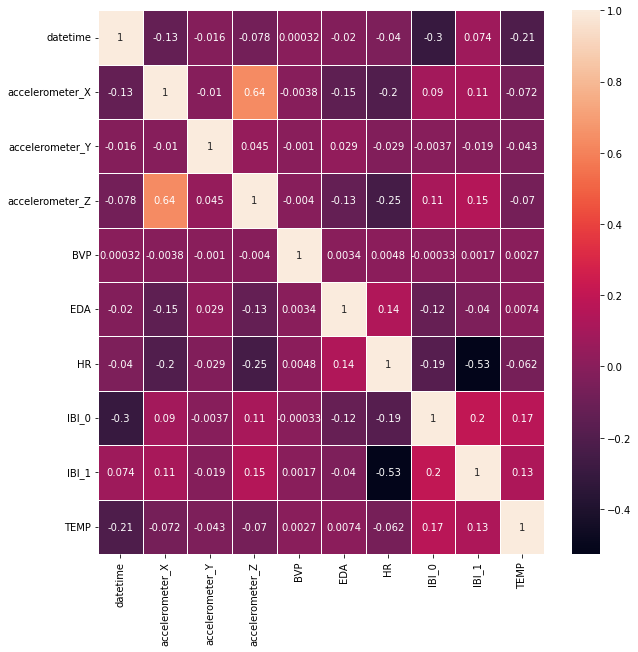

In [255]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(data.corr(), linewidth=0.8,annot = True)
plt.show()

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'accelerometer_X'}>,
        <AxesSubplot:title={'center':'accelerometer_Y'}>],
       [<AxesSubplot:title={'center':'accelerometer_Z'}>,
        <AxesSubplot:title={'center':'BVP'}>,
        <AxesSubplot:title={'center':'EDA'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'IBI_0'}>,
        <AxesSubplot:title={'center':'IBI_1'}>],
       [<AxesSubplot:title={'center':'TEMP'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

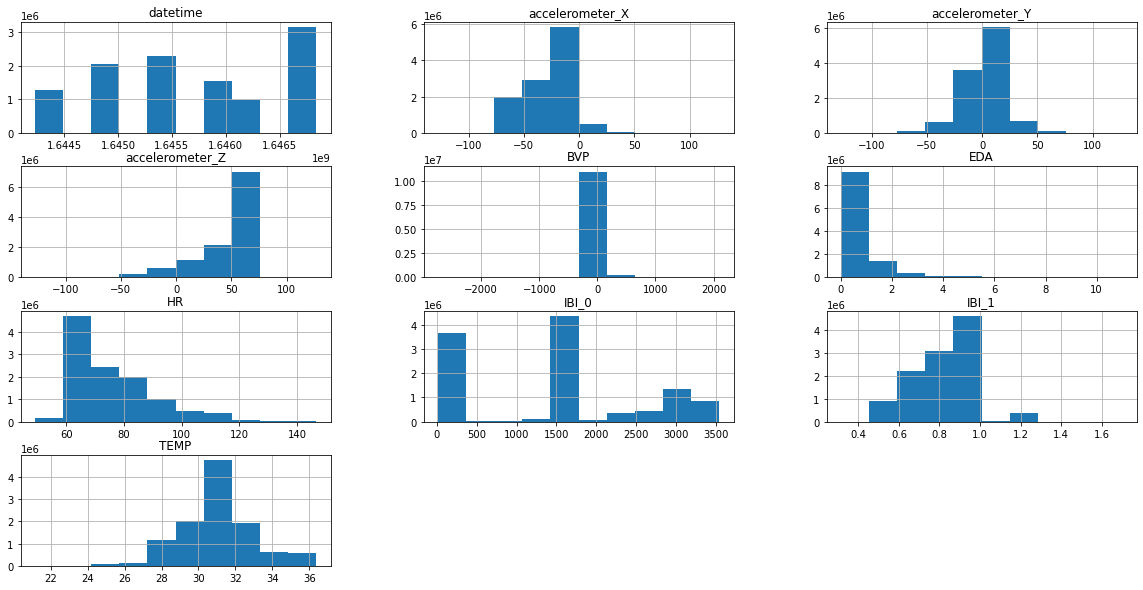

In [257]:
data.hist(figsize=(20,10))